In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.preprocessing import scale
import talib

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Load Data

In [4]:
data = pd.read_hdf('C:\\Users\\2022080101\\data\\S&P500.h5', 'S&P500')

In [5]:
data

Adj Close       Close        High         Low        Open  \
    Date                                                                     
A   1999-12-31   47.400246   55.302216   57.179901   54.542202   56.866955   
    2000-01-03   44.143158   51.502148   56.464592   48.193848   56.330471   
    2000-01-04   40.771103   47.567955   49.266811   46.316166   48.730328   
    2000-01-05   38.242058   44.617310   47.567955   43.141991   47.389126   
    2000-01-06   36.785965   42.918453   44.349072   41.577251   44.080830   
...                    ...         ...         ...         ...         ...   
ZTS 2022-08-24  162.630005  162.630005  163.869995  162.089996  163.199997   
    2022-08-25  165.529999  165.529999  165.639999  162.360001  163.550003   
    2022-08-26  159.889999  159.889999  166.240005  159.660004  165.710007   
    2022-08-29  157.869995  157.869995  159.139999  157.529999  158.309998   
    2022-08-30  157.080002  157.080002  158.750000  156.759995  158.479996   

                   Volume  
    Date                   
A   1999-12-31  1931197.0  
    2000-01-03  4674353.0  
    2000-01-04  4765083.0  
    2000-01-05  5758642.0  
    2000-01-06  2534434.0  
...                   ...  
ZTS 2022-08-24  1206400.0  
    2022-08-25  1088800.0  
    2022-08-26  1468000.0  
    2022-08-29  1236900.0  
    2022-08-30  1918800.0  

[2545560 rows x 6 columns]

In [6]:
data.index.names = ['Ticker', 'Date']

In [7]:
data

Adj Close       Close        High         Low        Open  \
Ticker Date                                                                     
A      1999-12-31   47.400246   55.302216   57.179901   54.542202   56.866955   
       2000-01-03   44.143158   51.502148   56.464592   48.193848   56.330471   
       2000-01-04   40.771103   47.567955   49.266811   46.316166   48.730328   
       2000-01-05   38.242058   44.617310   47.567955   43.141991   47.389126   
       2000-01-06   36.785965   42.918453   44.349072   41.577251   44.080830   
...                       ...         ...         ...         ...         ...   
ZTS    2022-08-24  162.630005  162.630005  163.869995  162.089996  163.199997   
       2022-08-25  165.529999  165.529999  165.639999  162.360001  163.550003   
       2022-08-26  159.889999  159.889999  166.240005  159.660004  165.710007   
       2022-08-29  157.869995  157.869995  159.139999  157.529999  158.309998   
       2022-08-30  157.080002  157.080002  158.750000  156.759995  158.479996   

                      Volume  
Ticker Date                   
A      1999-12-31  1931197.0  
       2000-01-03  4674353.0  
       2000-01-04  4765083.0  
       2000-01-05  5758642.0  
       2000-01-06  2534434.0  
...                      ...  
ZTS    2022-08-24  1206400.0  
       2022-08-25  1088800.0  
       2022-08-26  1468000.0  
       2022-08-29  1236900.0  
       2022-08-30  1918800.0  

[2545560 rows x 6 columns]

In [8]:
data.unstack(level = 0)

Adj Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABC   
Date                                                                            
1999-12-31   47.400246    NaN         NaN    0.783791         NaN    2.934864   
2000-01-03   44.143158    NaN         NaN    0.853355         NaN    3.007330   
2000-01-04   40.771103    NaN         NaN    0.781409         NaN    2.802011   
2000-01-05   38.242058    NaN         NaN    0.792843         NaN    3.019407   
2000-01-06   36.785965    NaN         NaN    0.724232         NaN    3.248882   
...                ...    ...         ...         ...         ...         ...   
2022-08-24  133.669998  13.99  178.322937  167.529999  137.910004  148.229996   
2022-08-25  136.009995  14.42  179.393417  170.029999  139.330002  150.419998   
2022-08-26  129.869995  13.74  172.058685  163.619995  136.350006  146.190002   
2022-08-29  128.110001  13.51  169.035583  161.380005  135.710007  147.490005   
2022-08-30  128.279999  13.33  168.966217  158.910004  135.550003  145.429993   

                                                            ...     Volume  \
Ticker            ABMD         ABT         ACN        ADBE  ...       WYNN   
Date                                                        ...              
1999-12-31   18.375000    9.655472         NaN   16.693565  ...        NaN   
2000-01-03   18.250000    9.306484         NaN   16.274673  ...        NaN   
2000-01-04   17.812500    9.040581         NaN   14.909401  ...        NaN   
2000-01-05   18.000000    9.023960         NaN   15.204174  ...        NaN   
2000-01-06   18.031250    9.339719         NaN   15.328289  ...        NaN   
...                ...         ...         ...         ...  ...        ...   
2022-08-24  268.040009  105.440002  306.260010  405.649994  ...  1337400.0   
2022-08-25  274.450012  105.889999  309.769989  403.929993  ...  1486700.0   
2022-08-26  258.119995  101.900002  298.130005  381.019989  ...  1599000.0   
2022-08-29  256.980011  101.839996  295.140015  375.260010  ...  1127600.0   
2022-08-30  258.649994  102.199997  292.500000  375.070007  ...  1887700.0   

                                                                             \
Ticker            XEL         XOM       XRAY       XYL        YUM       ZBH   
Date                                                                          
1999-12-31   262900.0   2758600.0   241200.0       NaN  1395451.0       NaN   
2000-01-03  2738600.0  13458200.0   582300.0       NaN  3033493.0       NaN   
2000-01-04   425200.0  14510800.0   317700.0       NaN  3315031.0       NaN   
2000-01-05   500200.0  17485000.0  1188000.0       NaN  4642602.0       NaN   
2000-01-06   344100.0  19461600.0   534300.0       NaN  3947658.0       NaN   
...               ...         ...        ...       ...        ...       ...   
2022-08-24  1431100.0  17050300.0  4222500.0  412300.0  1300100.0  620600.0   
2022-08-25  1553600.0  15305700.0  1674300.0  487000.0  1230600.0  530700.0   
2022-08-26  2413300.0  15531400.0  2240200.0  628700.0  1542600.0  627700.0   
2022-08-29  2278200.0  23059200.0  1555700.0  873200.0  1472900.0  556700.0   
2022-08-30  2538400.0  17086800.0  2640000.0  643700.0  1230700.0  782900.0   

                                             
Ticker           ZBRA       ZION        ZTS  
Date                                         
1999-12-31   278100.0   158100.0        NaN  
2000-01-03  1055700.0  1199600.0        NaN  
2000-01-04   522450.0   816100.0        NaN  
2000-01-05   612225.0  1124700.0        NaN  
2000-01-06   263925.0  1112100.0        NaN  
...               ...        ...        ...  
2022-08-24   210900.0   549300.0  1206400.0  
2022-08-25   179300.0   864600.0  1088800.0  
2022-08-26   284300.0  1215200.0  1468000.0  
2022-08-29   235300.0  1221200.0  1236900.0  
2022-08-30   311700.0   941600.0  1918800.0  

[5703 rows x 3006 columns]

In [9]:
o = data['Open'].unstack(level = 0)
h = data['High'].unstack(level = 0)
l = data['Low'].unstack(level = 0)
c = data['Adj Close'].unstack(level = 0)
v = data['Volume'].unstack(level = 0)
r = c.pct_change()
ret_forward = r.shift(-1)

In [10]:
close_diff = c.diff(1) #今天減昨天

In [11]:
close_diff_2 = close_diff.shift(1) # 昨天減前天

In [12]:
close_diff_3 = close_diff.shift(2) #前天減大前天

In [13]:
diff_sign = np.sign(close_diff) + np.sign(close_diff_2) + np.sign(close_diff_3)

In [14]:
diff_rank = diff_sign.rank(axis=1, pct=True)

In [15]:
reverse_diff_rank = 1-diff_rank

In [16]:
volume_ratio = v.rolling(5).sum()/v.rolling(20).sum()

In [17]:
alpha_030 = reverse_diff_rank * volume_ratio

# 策略

https://news.cnyes.com/news/id/770663

價量背離文章：https://www.cmoney.tw/notes/note-detail.aspx?nid=50757 <br>

多頭部位持有期間: {1,2,3}，以這3個持有期間分成3個策略。 <br>
alpha_030 > 0.125就進場

Strategy 1：When alpha_030 >= 0.125就進場，隔天出場

In [18]:
initial_capital = 1000000
daily_end_capital = initial_capital
daily_begin_capital = initial_capital
long_pos = 0
total_pos = 0
buy_price = 0
sell_price = 0
daily_ret = 0
earn = []
ret = []
posi_ret = []
neg_ret = []

以下用AAPL 做操作，並以2021年當作演練

In [19]:
date_2021 = c['AAPL']['2021'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))

In [20]:
alpha_date = alpha_030['AAPL']['2021'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))
c_date = c['AAPL']['2021'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))

In [21]:
for i in range(1,len(date_2021)-2):
    if daily_begin_capital<=0:
        print(f"在 {date_2021[i]} 破產，結束交易")
        break
    if alpha_030['AAPL']['2021'][i] >=0.125:
        long_pos +=1000 # 假設一次買1000股
        daily_end_capital -= c['AAPL']['2021'][i]* 1000 #以 今天的收盤價 買進(買不到過去的股票)
        buy_price = c['AAPL']['2021'][i]
        print(f"在 {date_2021[i]} 根據第1個策略，以 {buy_price}買進")
        if daily_end_capital <100000:
            print('注意：在買進之後之後，資本小於10%')
        sell_price = c['AAPL']['2021'][i+1]
        daily_ret = (sell_price - buy_price)/buy_price
        if daily_ret >=0:
            posi_ret.append(daily_ret)
        else:
            neg_ret.append(daily_ret)
        ret.append(daily_ret)
        earn.append(sell_price * 1000)
        print(f"在 {date_2021[i+1]} 根據第1個策略，以 {sell_price}賣出，單次交易報酬：{daily_ret}")
        total_pos -=1000
        daily_end_capital += sell_price * 1000
    daily_begin_capital = daily_end_capital
total_ret = daily_end_capital/initial_capital

在 2021    01    05  00:00.00 根據第1個策略，以 129.6707000732422買進
在 2021    01    06  00:00.00 根據第1個策略，以 125.30580139160156賣出，單次交易報酬：-0.03366141062842407
在 2021    01    06  00:00.00 根據第1個策略，以 125.30580139160156買進
在 2021    01    07  00:00.00 根據第1個策略，以 129.58163452148438賣出，單次交易報酬：0.03412318569768465
在 2021    01    07  00:00.00 根據第1個策略，以 129.58163452148438買進
在 2021    01    08  00:00.00 根據第1個策略，以 130.70010375976562賣出，單次交易報酬：0.008631387020325091
在 2021    01    08  00:00.00 根據第1個策略，以 130.70010375976562買進
在 2021    01    11  00:00.00 根據第1個策略，以 127.66145324707031賣出，單次交易報酬：-0.023249029077134692
在 2021    01    12  00:00.00 根據第1個策略，以 127.48330688476562買進
在 2021    01    13  00:00.00 根據第1個策略，以 129.5519256591797賣出，單次交易報酬：0.01622658546411824
在 2021    01    13  00:00.00 根據第1個策略，以 129.5519256591797買進
在 2021    01    14  00:00.00 根據第1個策略，以 127.5921859741211賣出，單次交易報酬：-0.015127059478947482
在 2021    01    14  00:00.00 根據第1個策略，以 127.5921859741211買進
在 2021    01    15  00:00.00 根據第1個策略，以 125.84026336669922

在 2021    12    07  00:00.00 根據第1個策略，以 170.4745635986328買進
在 2021    12    08  00:00.00 根據第1個策略，以 174.35848999023438賣出，單次交易報酬：0.022783025863881496
在 2021    12    13  00:00.00 根據第1個策略，以 175.01577758789062買進
在 2021    12    14  00:00.00 根據第1個策略，以 173.61158752441406賣出，單次交易報酬：-0.008023219865256986
在 2021    12    14  00:00.00 根據第1個策略，以 173.61158752441406買進
在 2021    12    15  00:00.00 根據第1個策略，以 178.5611114501953賣出，單次交易報酬：0.02850917957930213
在 2021    12    15  00:00.00 根據第1個策略，以 178.5611114501953買進
在 2021    12    16  00:00.00 根據第1個策略，以 171.5500946044922賣出，單次交易報酬：-0.039263962845900266
在 2021    12    16  00:00.00 根據第1個策略，以 171.5500946044922買進
在 2021    12    17  00:00.00 根據第1個策略，以 170.43472290039062賣出，單次交易報酬：-0.006501725963328938
在 2021    12    17  00:00.00 根據第1個策略，以 170.43472290039062買進
在 2021    12    20  00:00.00 根據第1個策略，以 169.0504608154297賣出，單次交易報酬：-0.008121948752015513
在 2021    12    20  00:00.00 根據第1個策略，以 169.0504608154297買進
在 2021    12    21  00:00.00 根據第1個策略，以 172.277099609375賣

In [22]:
total_ret

1.0233851013183595

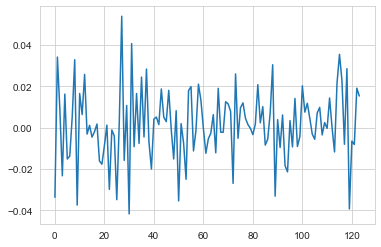

In [23]:
plt.plot(ret)

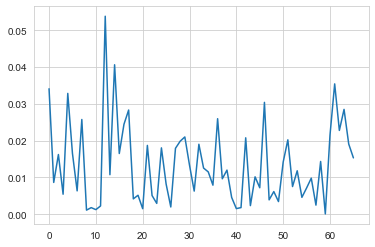

In [24]:
plt.plot(posi_ret)

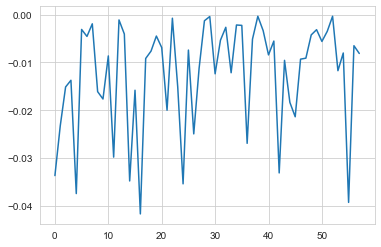

In [25]:
plt.plot(neg_ret)

# Using Kelly formula to decide the amount of betting

https://bjlkeng.github.io/posts/optimal-betting-and-the-kelly-criterion/ <br>

https://en.wikipedia.org/wiki/Kelly_criterion

$f^{*} = \frac{p}{a}- \frac{q}{b}$

p : 勝率 <br>
q = 1-p <br>
a = the fraction that is lost in a negative outcome <br>
b = the fraction that is gained in a positive outcome

參數p 參考alpha_030_S&P500_Methodology檔案提及之 P(increase | alpha030 >= 0.125) <br>
q = 1-p

a = 策略交易平均虧損(只看虧損)

b = 策略交易平均獲利(只看獲利)

動態調整下注比例： 先假設第一次交易的獲益率為前一年平均獲益率，根據歷史的機率之後計算出第一次下注的比例。 之後得到第一次交易的實際報酬，調整後的發生機率，計算出下一次的下注比例。

In [26]:
p_de = 125 #參考前一份檔案之sum(multiply['AAPL']['2021'] == 1)
p_nu = 67  #參考前一份檔案之intersect_alpha_030

In [27]:
p = p_nu/p_de
q = 1-p
a = abs(sum(neg_ret)/len(neg_ret))
b = sum(posi_ret)/len(posi_ret)

In [28]:
f = p/a - q/b

In [29]:
f

8.712928304078304

In [30]:
initial_capital = 1000000
daily_end_capital = initial_capital
daily_begin_capital = initial_capital
long_pos = 0
buy_price = 0
sell_price = 0
daily_ret = 0
earn = []
ret = []
posi_ret_2 = []
neg_ret_2 = []
posi_pre = posi_ret
neg_pre = neg_ret

In [31]:
date_2022 = c['AAPL']['2022'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))

In [32]:
alpha_date = alpha_030['AAPL']['2022'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))
c_date = c['AAPL']['2022'].index.format(formatter=lambda x: x.strftime('%Y    %m    %d  %H:%M.%S'))

In [33]:
for i in range(1,len(date_2022)-2):
    if daily_begin_capital<=0:
        print(f"在 {date_2022[i]} 破產，結束交易")
        break
    if alpha_030['AAPL']['2022'][i] >=0.125:
        buy_price = c['AAPL']['2022'][i]
        long_pos = round(f*(1/100) * daily_begin_capital/buy_price) # 假設
        daily_end_capital -= buy_price * long_pos #以 今天的收盤價 買進(買不到過去的股票)
        print(f"在 {date_2022[i]} 根據第1個策略，以 {buy_price}買進")
        if daily_end_capital <100000:
            print('注意：在買進之後之後，資本小於10%')
        p_de +=1
        sell_price = c['AAPL']['2022'][i+1]
        daily_ret = (sell_price - buy_price)/buy_price
        if daily_ret >=0:
            p_nu+=1
            posi_pre.append(daily_ret)
            posi_pre.pop(0)
            posi_ret_2.append(daily_ret)
        else:
            neg_pre.append(daily_ret)
            neg_pre.pop(0)
            neg_ret_2.append(daily_ret)
        ret.append(daily_ret)
        earn.append(sell_price * long_pos)
        print(f"在 {date_2022[i+1]} 根據第1個策略，以 {sell_price}賣出，單次交易報酬：{daily_ret}")
        daily_end_capital += sell_price * long_pos
        a = abs(sum(neg_ret)/len(neg_ret))
        b = sum(posi_ret)/len(posi_ret)
        p = p_nu/p_de
        q = 1-p
        f = p/a - q/b     
    daily_begin_capital = daily_end_capital
total_ret = daily_end_capital/initial_capital

在 2022    01    04  00:00.00 根據第1個策略，以 178.95944213867188買進
在 2022    01    05  00:00.00 根據第1個策略，以 174.19915771484375賣出，單次交易報酬：-0.026599794718512152
在 2022    01    05  00:00.00 根據第1個策略，以 174.19915771484375買進
在 2022    01    06  00:00.00 根據第1個策略，以 171.2911834716797賣出，單次交易報酬：-0.016693388655324538
在 2022    01    06  00:00.00 根據第1個策略，以 171.2911834716797買進
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172賣出，單次交易報酬：0.000988442720786578
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172買進
在 2022    01    10  00:00.00 根據第1個策略，以 171.48040771484375賣出，單次交易報酬：0.00011613590481661429
在 2022    01    20  00:00.00 根據第1個策略，以 163.83204650878906買進
在 2022    01    21  00:00.00 根據第1個策略，以 161.74070739746094賣出，單次交易報酬：-0.012765140617442824
在 2022    01    21  00:00.00 根據第1個策略，以 161.74070739746094買進
在 2022    01    24  00:00.00 根據第1個策略，以 160.95396423339844賣出，單次交易報酬：-0.004864224824546863
在 2022    01    24  00:00.00 根據第1個策略，以 160.95396423339844買進
在 2022    01    25  00:00.00 根據第1個策略，以 159.1215362

In [34]:
total_ret

0.9957558417816162

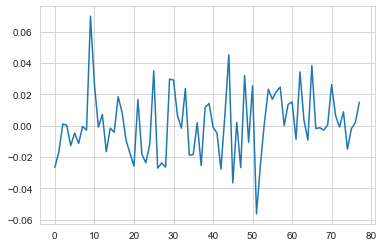

In [35]:
plt.plot(ret)

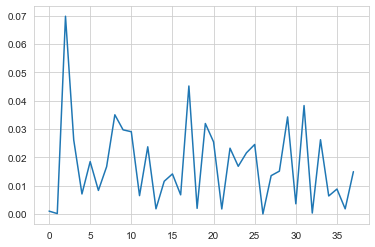

In [36]:
plt.plot(posi_ret_2)

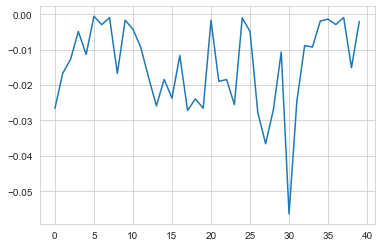

In [37]:
plt.plot(neg_ret_2)

# 策略2，進場後持有2天

In [38]:
initial_capital = 1000000
daily_end_capital = initial_capital
daily_begin_capital = initial_capital
long_pos = 0
buy_price = 0
sell_price = 0
daily_ret = 0
earn = []
ret = []
posi_ret_3 = []
neg_ret_3 = []
posi_pre = posi_ret
neg_pre = neg_ret

In [39]:
for i in range(1,len(date_2022)-2):
    if daily_begin_capital<=0:
        print(f"在 {date_2022[i]} 破產，結束交易")
        break
    if alpha_030['AAPL']['2022'][i] >=0.125:
        buy_price = c['AAPL']['2022'][i]
        long_pos = round(f*(1/100) * daily_begin_capital/buy_price) # 假設
        daily_end_capital -= buy_price * long_pos #以 今天的收盤價 買進(買不到過去的股票)
        print(f"在 {date_2022[i]} 根據第1個策略，以 {buy_price}買進")
        if daily_end_capital <100000:
            print('注意：在買進之後之後，資本小於10%')
        p_de +=1
        sell_price = c['AAPL']['2022'][i+2]
        daily_ret = (sell_price - buy_price)/buy_price
        if daily_ret >=0:
            p_nu+=1
            posi_pre.append(daily_ret)
            posi_pre.pop(0)
            posi_ret_3.append(daily_ret)
        else:
            neg_pre.append(daily_ret)
            neg_pre.pop(0)
            neg_ret_3.append(daily_ret)
        ret.append(daily_ret)
        earn.append(sell_price * long_pos)
        print(f"在 {date_2022[i+2]} 根據第1個策略，以 {sell_price}賣出，單次交易報酬：{daily_ret}")
        daily_end_capital += sell_price * long_pos
        a = abs(sum(neg_ret)/len(neg_ret))
        b = sum(posi_ret)/len(posi_ret)
        p = p_nu/p_de
        q = 1-p
        f = p/a - q/b     
    daily_begin_capital = daily_end_capital
total_ret = daily_end_capital/initial_capital

在 2022    01    04  00:00.00 根據第1個策略，以 178.95944213867188買進
在 2022    01    06  00:00.00 根據第1個策略，以 171.2911834716797賣出，單次交易報酬：-0.042849142662448714
在 2022    01    05  00:00.00 根據第1個策略，以 174.19915771484375買進
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172賣出，單次交易報酬：-0.015721446393039577
在 2022    01    06  00:00.00 根據第1個策略，以 171.2911834716797買進
在 2022    01    10  00:00.00 根據第1個策略，以 171.48040771484375賣出，單次交易報酬：0.0011046934192929304
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172買進
在 2022    01    11  00:00.00 根據第1個策略，以 174.35848999023438賣出，單次交易報酬：0.016901823333705622
在 2022    01    20  00:00.00 根據第1個策略，以 163.83204650878906買進
在 2022    01    24  00:00.00 根據第1個策略，以 160.95396423339844賣出，單次交易報酬：-0.01756727292810949
在 2022    01    21  00:00.00 根據第1個策略，以 161.74070739746094買進
在 2022    01    25  00:00.00 根據第1個策略，以 159.1215362548828賣出，單次交易報酬：-0.016193642186452077
在 2022    01    24  00:00.00 根據第1個策略，以 160.95396423339844買進
在 2022    01    26  00:00.00 根據第1個策略，以 159.0319213867

In [40]:
total_ret

0.994467353378296

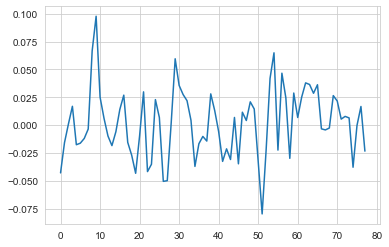

In [41]:
plt.plot(ret)

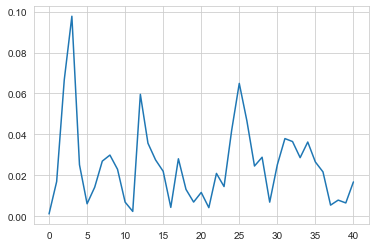

In [42]:
plt.plot(posi_ret_3)

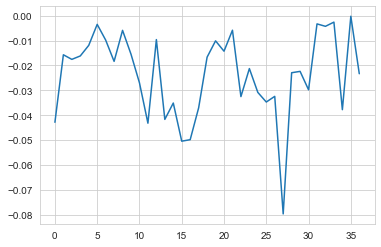

In [43]:
plt.plot(neg_ret_3)

# 策略3，進場後持有3天

In [44]:
initial_capital = 1000000
daily_end_capital = initial_capital
daily_begin_capital = initial_capital
long_pos = 0
buy_price = 0
sell_price = 0
daily_ret = 0
earn = []
ret = []
posi_ret_4 = []
neg_ret_4 = []
posi_pre = posi_ret
neg_pre = neg_ret

In [45]:
for i in range(1,len(date_2022)-3):
    if daily_begin_capital<=0:
        print(f"在 {date_2022[i]} 破產，結束交易")
        break
    if alpha_030['AAPL']['2022'][i] >=0.125:
        buy_price = c['AAPL']['2022'][i]
        long_pos = round(f*(1/100) * daily_begin_capital/buy_price) # 假設
        daily_end_capital -= buy_price * long_pos #以 今天的收盤價 買進(買不到過去的股票)
        print(f"在 {date_2022[i]} 根據第1個策略，以 {buy_price}買進")
        if daily_end_capital <100000:
            print('注意：在買進之後之後，資本小於10%')
        p_de +=1
        sell_price = c['AAPL']['2022'][i+3]
        daily_ret = (sell_price - buy_price)/buy_price
        if daily_ret >=0:
            p_nu+=1
            posi_pre.append(daily_ret)
            posi_pre.pop(0)
            posi_ret_4.append(daily_ret)
        else:
            neg_pre.append(daily_ret)
            neg_pre.pop(0)
            neg_ret_4.append(daily_ret)
        ret.append(daily_ret)
        earn.append(sell_price * long_pos)
        print(f"在 {date_2022[i+3]} 根據第1個策略，以 {sell_price}賣出，單次交易報酬：{daily_ret}")
        daily_end_capital += sell_price * long_pos
        a = abs(sum(neg_ret)/len(neg_ret))
        b = sum(posi_ret)/len(posi_ret)
        p = p_nu/p_de
        q = 1-p
        f = p/a - q/b     
    daily_begin_capital = daily_end_capital
total_ret = daily_end_capital/initial_capital

在 2022    01    04  00:00.00 根據第1個策略，以 178.95944213867188買進
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172賣出，單次交易報酬：-0.04190305386481878
在 2022    01    05  00:00.00 根據第1個策略，以 174.19915771484375買進
在 2022    01    10  00:00.00 根據第1個策略，以 171.48040771484375賣出，單次交易報酬：-0.015607136312624843
在 2022    01    06  00:00.00 根據第1個策略，以 171.2911834716797買進
在 2022    01    11  00:00.00 根據第1個策略，以 174.35848999023438賣出，單次交易報酬：0.017906972538734422
在 2022    01    07  00:00.00 根據第1個策略，以 171.4604949951172買進
在 2022    01    12  00:00.00 根據第1個策略，以 174.806640625賣出，單次交易報酬：0.019515548639808273
在 2022    01    20  00:00.00 根據第1個策略，以 163.83204650878906買進
在 2022    01    25  00:00.00 根據第1個策略，以 159.1215362548828賣出，單次交易報酬：-0.028752068684276287
在 2022    01    21  00:00.00 根據第1個策略，以 161.74070739746094買進
在 2022    01    26  00:00.00 根據第1個策略，以 159.03192138671875賣出，單次交易報酬：-0.01674770720574152
在 2022    01    24  00:00.00 根據第1個策略，以 160.95396423339844買進
在 2022    01    27  00:00.00 根據第1個策略，以 158.56385803222656賣出

In [46]:
total_ret

0.9967796916656494

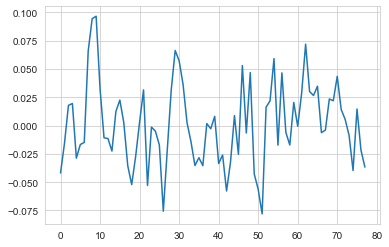

In [47]:
plt.plot(ret)

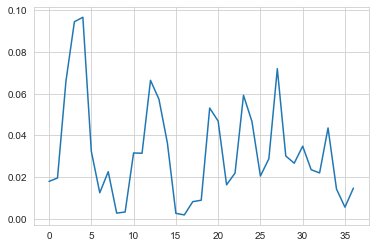

In [48]:
plt.plot(posi_ret_4)

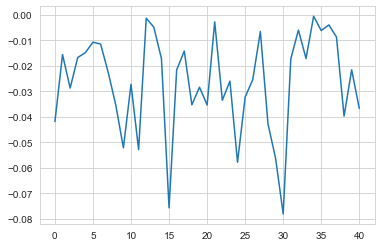

In [49]:
plt.plot(neg_ret_4)

# Sharpe Ratio

In [50]:
R_f = 0.01

In [51]:
r5 = []
for i in range(4,len(ret)):
    ret_5 = (1+ret[i-4])*(1+ret[i-3])*(1+ret[i-2])*(1+ret[i-1])*(1+ret[i-0])-1
    r5.append(ret_5)

In [52]:
std5 = []
n=5
for i in range(n-1,len(ret)):
    ret_5mean = (ret[i-4]+ret[i-3]+ret[i-2]+ret[i-1]+ret[i-0])/n
    for j in range(0,n):
        square_sum_5 = np.sum((ret[i-j]-ret_5mean)**2)
    std_5 = (square_sum_5/(n-1))**(0.5)
    std5.append(std_5)

In [53]:
excess_ret = np.array(r5) - R_f

In [55]:
SR = []

In [56]:
for i in range(len(r5)):
    SR.append(excess_ret/std5)

In [59]:
SR

[array([-3.69523597e+00, -6.33180765e+00, -2.99332535e+00,  1.72592147e+00,
         3.59488068e+00,  7.41712198e+00,  8.34888005e+00,  5.77654243e+01,
         7.43932039e+00,  1.80903368e+00, -6.74845595e-01, -4.62572941e+00,
        -1.13763037e+00, -3.38092978e+00, -5.43275463e+00, -4.84860419e+00,
        -9.43295545e+00, -9.24257922e+00, -6.50920511e+00, -6.45820395e+00,
        -8.88451858e+00, -2.75538189e+00, -1.37896893e+01, -1.11188301e+01,
        -1.53970715e+01, -4.68041193e+00,  9.55597010e-01,  6.08191587e+00,
         5.36726759e+01,  7.88439738e+00,  1.44374764e+00, -2.26969449e+00,
        -9.41834815e+00, -2.90223372e+01, -1.39515321e+01, -7.72923123e+00,
        -6.15942271e+00, -1.00735160e+01, -1.20647880e+01, -7.93520499e+00,
        -5.36623782e+01, -5.33351513e+02, -2.79810762e+00, -9.14222116e-01,
         2.05907883e+01,  7.70306790e-01, -7.60266481e-01, -1.38268290e+01,
        -3.55881895e+00, -1.93739425e+01, -2.16503734e+00, -3.40863444e-01,
         2.6

# MDD

In [60]:
Roll_max = c['AAPL']['2022'].rolling(window=5,min_periods=1).max()

In [61]:
Daily_drawdown = c['AAPL']['2022']/Roll_max -1.0

In [62]:
Daily_drawdown

Date
2022-01-03    0.000000
2022-01-04   -0.012692
2022-01-05   -0.038954
2022-01-06   -0.054997
2022-01-07   -0.054063
                ...   
2022-08-24   -0.038013
2022-08-25   -0.008687
2022-08-26   -0.037699
2022-08-29   -0.050873
2022-08-30   -0.065400
Name: AAPL, Length: 166, dtype: float64

In [63]:
Max_drawdown = Daily_drawdown.rolling(window=5,min_periods=1).min()

In [64]:
Max_drawdown

Date
2022-01-03    0.000000
2022-01-04   -0.012692
2022-01-05   -0.038954
2022-01-06   -0.054997
2022-01-07   -0.054997
                ...   
2022-08-24   -0.041936
2022-08-25   -0.041936
2022-08-26   -0.041936
2022-08-29   -0.050873
2022-08-30   -0.065400
Name: AAPL, Length: 166, dtype: float64

<AxesSubplot:xlabel='Date'>

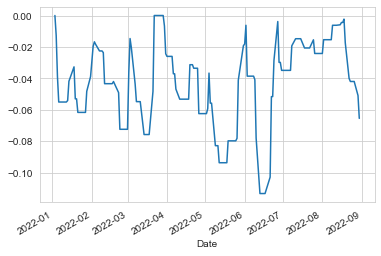

In [65]:
Max_drawdown.plot()